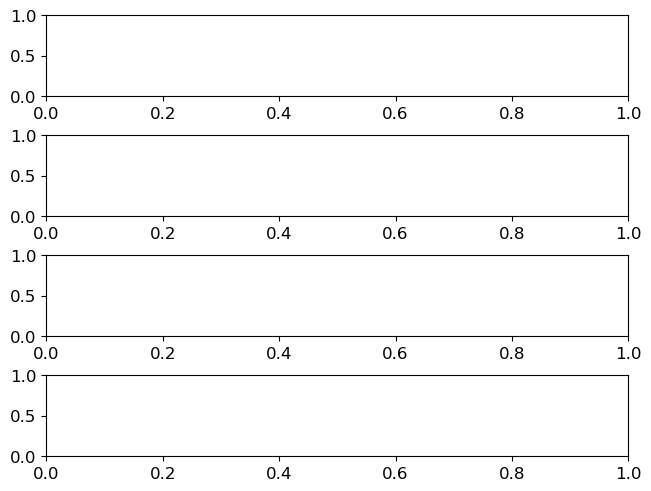

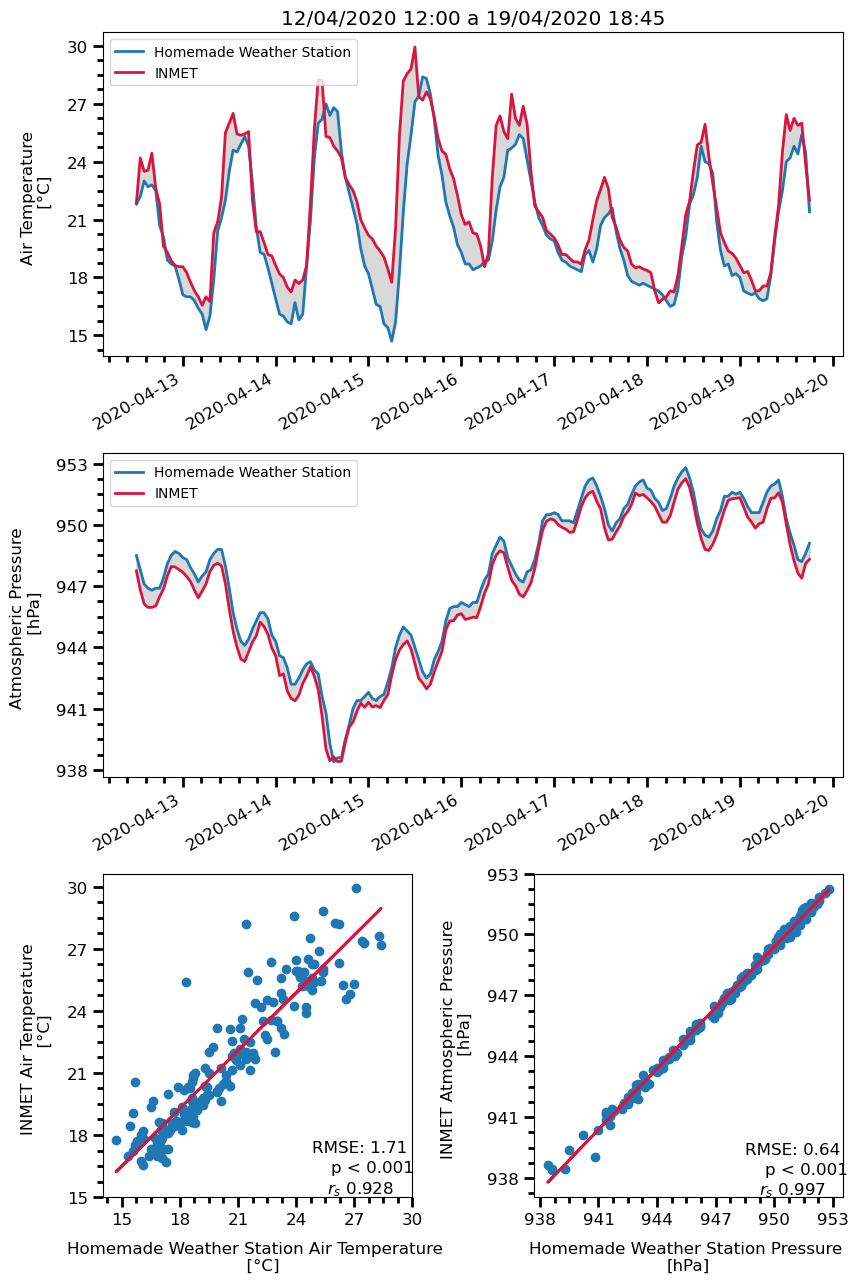

In [3]:
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import netCDF4
import scipy.stats
import warnings
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager
# MAtplotlib resources.
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'font.size':'12',
    })

#1. Open database and import variables.
# Open CSV file and import variables.
#https://gist.github.com/uesleisutil/317b6ab414aabb75cd4c9f559f686135
#G:\RegCM4\Python\cru_2011.2020.pre\Oct_RMSE
csv_import = pd.read_csv('/mnt/g/RegCM4/Python/cru_2011.2020.pre/Oct_RMSE/homemade_weather_station.csv', keep_default_na=True, delimiter=',',
 header=None, names=['Temp_WS','Pressure_WS'])
temp_ws = csv_import['Temp_WS']
temp_ws = temp_ws.values
pres_ws = csv_import['Pressure_WS']
pres_ws = pres_ws.values

csv_import = pd.read_csv('/mnt/g/RegCM4/Python/cru_2011.2020.pre/Oct_RMSE/inmet.csv',keep_default_na=True, delimiter=','
, header=None,names=['Temp_INMET','Pressure_INMET'])
temp_inmet = csv_import['Temp_INMET']
temp_inmet = temp_inmet.values
pres_inmet = csv_import['Pressure_INMET']
pres_inmet = pres_inmet.values

#2. Calculate RMSE, correlation and p-value.
# Calculate correlation, trend and RMSE
# Variable 1 (Air Temperature)
stats = scipy.stats.spearmanr(temp_ws,temp_inmet, axis=0, nan_policy='propagate')
cor1  = str(stats[0])
pval1 = stats[1]
cor1  = cor1[0:5]
z1    = np.polyfit(temp_ws,temp_inmet, 1)
p1    = np.poly1d(z1)
rmse1 = np.sqrt(np.mean((temp_ws-temp_inmet)**2))
rmse1 = str(rmse1)
rmse1 = rmse1[0:4]

# Variable 2.
# Atmospheric Pressure.
stats = scipy.stats.spearmanr(pres_ws,pres_inmet, axis=0, nan_policy='propagate')
cor2  = str(stats[0])
pval2 = stats[1]
cor2  = cor2[0:5]
z2    = np.polyfit(pres_ws,pres_inmet, 1)
p2    = np.poly1d(z2)

rmse2 = np.sqrt(np.mean((pres_ws-pres_inmet)**2))
rmse2 = str(rmse2)
rmse2 = rmse2[0:4]

#4. Create variable to store X-Axis data.
# Rearrange time.
idx   = pd.date_range('2020-04-12 12:00', '2020-04-19 18:45', freq = '1H')
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter('%d/%M %Hh')

#3. Plot figure and set axis/data resources.
# Create figures subplots.
axs = plt.subplots(4, 1, constrained_layout=True)
fig = plt.figure()

# Y-axis range for each plots.
y_major_ticks  = np.arange(15, 32, 3)
y_major_ticks2 = np.arange(938, 953.1, 3)
y_major_ticks3 = np.arange(0, 1, 2)
y_major_ticks4 = np.arange(-4, 5, 0.5)

# Plot the figures.
# Plot 1.
ax1 = plt.subplot2grid((3,3), (0,0),rowspan=1,colspan=2)
ax1.plot(idx,temp_ws,linestyle='-',label='Homemade Weather Station', marker='',linewidth=2,color='C0')  
ax1.plot(idx,temp_inmet,linestyle='-',label='INMET',marker='',linewidth=2,color='crimson') 
plt.fill_between(idx, temp_ws, temp_inmet,alpha=0.3,color='gray')
ax1.legend(loc='upper left',fontsize=10)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both',  width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.set_yticks(y_major_ticks)
ax1.set_ylabel('Air Temperature \n [°C]',fontsize=12, labelpad=10)
ax1.set_title('12/04/2020 12:00 a 19/04/2020 18:45')
for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 2.
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=1,colspan=2) 
ax2.plot(idx,pres_ws,label='Homemade Weather Station',linestyle='-',marker='',linewidth=2,color='C0',alpha=1)    
ax2.plot(idx,pres_inmet,label='INMET',linestyle='-',marker='',linewidth=2,color='crimson')
plt.fill_between(idx, pres_ws, pres_inmet,alpha=0.3,color='gray')
ax2.legend(loc='upper left',fontsize=10)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both',  width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax2.set_yticks(y_major_ticks2)
ax2.set_ylabel('Atmospheric Pressure \n [hPa]',fontsize=12, labelpad=10)
for label in ax2.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")

# Plot 3.
ax3 = plt.subplot2grid((3,3), (2,0)) 
ax3.scatter(temp_ws,temp_inmet,color='C0')   
ax3.plot(temp_ws,p1(temp_ws),linestyle='-',color='crimson',linewidth=2)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='both',  width=2)
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
ax3.set_yticks(y_major_ticks)
ax3.set_xticks(y_major_ticks)
ax3.set_ylabel('INMET Air Temperature \n  [°C]',fontsize=12, labelpad=10)
ax3.set_xlabel('Homemade Weather Station Air Temperature \n  [°C]',fontsize=12, labelpad=10)
ax3.text(25.6,15.2,'$r_{s}$ '+cor1,color='k',fontsize=12)
if pval1 < 0.001:
    ax3.text(25.8,16.2,'p < 0.001',color='k',fontsize=12)
else:
    ax3.text(25.8,16.2,'p > 0.001',color='k',fontsize=12)  
ax3.text(24.8,17.2,'RMSE: '+rmse1,color='k',fontsize=12)

# plot 4.
ax4 = plt.subplot2grid((3,3), (2,1),)     
ax4.scatter(pres_ws,pres_inmet,color='C0')  
ax4.plot(pres_ws,p2(pres_ws),linestyle='-',color='crimson',linewidth=2)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='both',  width=2)
ax4.tick_params(which='major', length=7)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks(y_major_ticks2)
ax4.set_xticks(y_major_ticks2)
ax4.set_ylabel('INMET Atmospheric Pressure \n [hPa]',fontsize=12, labelpad=10)
ax4.set_xlabel('Homemade Weather Station Pressure \n[hPa]',fontsize=12, labelpad=10)
ax4.text(949.2,937.2,'$r_{s}$ '+cor2,color='k',fontsize=12)
if pval2 < 0.001:
    ax4.text(949.5,938.2,'p < 0.001',color='k',fontsize=12)
else:
    ax4.text(949.5,938.2,'p > 0.001',color='k',fontsize=12)
ax4.text(948.5,939.2,'RMSE: '+rmse2,color='k',fontsize=12)


# Set final fig resources and then save figure.
fig.set_size_inches(13, 13)
fig.tight_layout()
fig.subplots_adjust(hspace = 0.3)
fig.savefig('linear_reg_time_series.png',transparent=False, bbox_inches = 'tight', pad_inches=0, dpi=250)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)
# specify where is the location of the data
#path_in = "data/"
#path_out = "./"
# Open the NetCDF file
ncfile = Dataset('/mnt/g/WRF_Fortran_NCL/wrfout_d01_Ken.07.nc')
print(ncfile.variables.keys())


dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'VAR', 'OM_TMP', 'OM_S', 'OM_DEPTH', 'OM_U', 'OM_V', 'OM_ML', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP

In [11]:
# Program to produce plots of radial averages of storm
#  for Hurricane Florence (2018)
#
# Joseph B. Zambon
# 11 Jan 2021
from netCDF4 import Dataset
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
get_ipython().magic(u'pylab inline')
import pdb
import numpy as np
import pylab as py
#radial_data = '/mnt/g/WRF_Fortran_NCL/radial_data.py'
import radial_data as rad
#Populating the interactive namespace from numpy and matplotlib
t_slice = 15
num_levs = 34
center = [100,100] #75,75

#WRF files
#root_wrf      = '/raid0/datasets/hindcast/florence/waf_revisions/analysis/cross-section/'
#/mnt/g/WRF_Fortran_NCL/wrfout_d01_Ken
#wrf_control   = root_wrf + 'wrf_control_d02_zlevs.nc'
wrf_control = '/mnt/g/WRF_Fortran_NCL/wrfout_d01_Ken.07_zlevs.nc'
wrf_control = Dataset(wrf_control)
azi_avg = np.array([])
for p_lev in np.arange(0,num_levs,1):
    # Create coordinate grid
    npix = 195. #150.
    x = np.arange(npix) - npix/2.
    xx, yy = np.meshgrid(x, x)
    r = np.sqrt(xx**2 + yy**2)
    fake_psf = sqrt(wrf_control['u_tr_p'][t_slice,p_lev,:,:]** 2 + wrf_control['v_tr_p'][t_slice,p_lev,:,:]** 2)
    simulation = fake_psf

    rad_stats = rad.radial_data(simulation, x=xx, y=yy)
    km_rad = rad_stats.r *3  #convert grid -> km from center (3km/grid point)

#     py.figure()
#     py.plot(km_rad, rad_stats.mean)
#     py.xlabel('km from Center')
#     py.ylabel('Wind Azimuthal Average')
    rad_stats.mean[rad_stats.mean==0] = np.nan
    azi_avg = np.append(azi_avg,rad_stats.mean)

azi_avg=np.reshape(azi_avg,(num_levs, 225)) #107
zlevs = [50., 100., 250., 500., 750., 1000., \
              1250., 1500., 1750., 2000., \
              2250., 2500., 2750., 3000., \
              3250., 3500., 3750., 4000., \
              4250., 4500., 4750., 5000., \
              5250., 5500., 5750., 6000., \
              6250., 6500., 6750., 7000., \
              7250., 7500., 7750., 8000.]
[xxx,yyy] = meshgrid(km_rad,zlevs)
fig1=plt.figure(figsize=(5,6),dpi=300)
plt.pcolormesh(xxx,yyy,azi_avg,shading='gourad')
# plt.gca().invert_yaxis()
py.xlabel('km from Center')
py.ylabel('Height (m)')
plt.colorbar(label='Mean Tangential Wind Speed (m s$^-$$^1$)')
plt.savefig('wrf_control_zlevs_t' + str(t_slice) , bbox_inches = 'tight')

Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_8559/4142764935.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fake_psf = sqrt(wrf_control['u_tr_p'][t_slice,p_lev,:,:]** 2 + wrf_control['v_tr_p'][t_slice,p_lev,:,:]** 2)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 195 but corresponding boolean dimension is 225

In [14]:
# Program to produce plots of radial averages of storm
#  for Hurricane Florence (2018)
#
# Joseph B. Zambon
# 11 Jan 2021
from netCDF4 import Dataset
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
get_ipython().magic(u'pylab inline')
import pdb
import numpy as np
import pylab as py
import radial_data as rad
#Populating the interactive namespace from numpy and matplotlib
t_slice = 15
num_levs = 46
center = [75,75]

#WRF files
#root_wrf      = '/raid0/datasets/hindcast/florence/waf_revisions/analysis/cross-section/'
#wrf_control   = root_wrf + 'wrf_control_d02_plevs2.nc'

wrf_control = '/mnt/f/AZimuth/wrfout_d01_Ken.06_z.nc'
wrf_control = Dataset(wrf_control)



wrf_control = Dataset(wrf_control)
azi_avg = np.array([])
for p_lev in np.arange(0,num_levs,1):
    # Create coordinate grid
    npix = 150.
    x = np.arange(npix) - npix/2.
    xx, yy = np.meshgrid(x, x)
    r = np.sqrt(xx**2 + yy**2)
    fake_psf = sqrt(wrf_control['u_tr_p'][t_slice,p_lev,:,:]** 2 + wrf_control['v_tr_p'][t_slice,p_lev,:,:]** 2)
    simulation = fake_psf

    rad_stats = rad.radial_data(simulation, x=xx, y=yy)
    km_rad = rad_stats.r *3  #convert grid -> km from center (3km/grid point)

#     py.figure()
#     py.plot(km_rad, rad_stats.mean)
#     py.xlabel('km from Center')
#     py.ylabel('Wind Azimuthal Average')
    rad_stats.mean[rad_stats.mean==0] = np.nan
    azi_avg = np.append(azi_avg,rad_stats.mean)

azi_avg=np.reshape(azi_avg,(num_levs,107))
#/home/jbzambon/anaconda3/envs/florence_wave_analysis/lib/python3.8/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
#  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
plevs = [1000., 980., 960., 940., 920., 900., \
                880., 860., 840., 820., 800., \
                780., 760., 740., 720., 700., \
                680., 660., 640., 620., 600., \
                580., 560., 540., 520., 500., \
                480., 460., 440., 420., 400., \
                380., 360., 340., 320., 300., \
                280., 260., 240., 220., 200., \
                180., 160., 140., 120., 100.]
[xxx,yyy] = meshgrid(km_rad,plevs)
fig1=plt.figure(figsize=(5,6),dpi=300)
plt.pcolormesh(xxx,yyy,azi_avg,shading='gourad')
plt.gca().invert_yaxis()
py.xlabel('km from Center')
py.ylabel('Height (hPa)')
plt.colorbar(label='Mean Tangential Wind Speed (m s$^-$$^1$)')
plt.savefig('wrf_control_plevs_t' + str(t_slice) , bbox_inches = 'tight')

Populating the interactive namespace from numpy and matplotlib


OSError: [Errno 36] File name too long: b"<class 'netCDF4._netCDF4.Dataset'>\nroot group (NETCDF3_CLASSIC data model, file format NETCDF3):\n    title: wrfout_d01_Ken.06_z.nc\n    Conventions: CF 1.6, Standard Name Table v19\n    source: wrfout_d01_Ken.06.nc\n    notes: Created with NCL script:  ncl_cf.ncl\n    created_by: Joseph B. Zambon: jbzambon@ncsu.edu\n    institution: North Carolina State University - MEAS\n    creation_date: Tue Nov 15 11:57:43 CST 2022\n    dimensions(sizes): time(33), pressure(46), south_north(195), west_east(225)\n    variables(dimensions): float64 time(time), int32 DateTime(time), int32 year(time), int32 month(time), int32 day(time), int32 hour(time), int32 minute(time), float32 pressure(pressure), float32 lat(south_north, west_east), float32 lon(south_north, west_east), float32 Z_sfc(south_north, west_east), float32 Z_p(time, pressure, south_north, west_east), float32 T_p(time, pressure, south_north, west_east), float32 theta_p(time, pressure, south_north, west_east), float32 Td_p(time, pressure, south_north, west_east), float32 r_v_p(time, pressure, south_north, west_east), float32 q_p(time, pressure, south_north, west_east), float32 rh_p(time, pressure, south_north, west_east), float32 u_tr_p(time, pressure, south_north, west_east), float32 v_tr_p(time, pressure, south_north, west_east), float32 ws_p(time, pressure, south_north, west_east), float32 wd_p(time, pressure, south_north, west_east), float32 w_p(time, pressure, south_north, west_east), float32 r_cloud_p(time, pressure, south_north, west_east), float32 r_rain_p(time, pressure, south_north, west_east), float32 r_ice_p(time, pressure, south_north, west_east), float32 r_snow_p(time, pressure, south_north, west_east), float32 pvo_p(time, pressure, south_north, west_east), float32 avo_p(time, pressure, south_north, west_east)\n    groups: "